## Στοιχεία Ομάδας

Αριθμός Ομάδας: Μ.Α.11

    > Γκαμουλάκος Παρασκευάς: 
    > Καρυπιάδης Ευστράτιος: 03114911 
    > Μήτρο Νικολάος: 

In [1]:
# import warnings
# warnings.filterwarnings('ignore')

---

## Εισαγωγή του Dataset

Το σύνολο των δεδομένων μας συλλέχθησε με τη χρήση τηλεσκοπίων *MAGIC(Major Atmospheric Gamma Imaging Cherenkov Telescopes)*. Πιο συγκεκριμένα, τα τηλεσκόπια αυτά εκμεταλλεύονται τη ραδιενέργεια *Cherenkov* που απελευθερώνεται από επιταχυνόμενα σωματίδια και συλλέγει αντίστοιχους παλμούς ραδιενέργειας, οι οποίοι προέρχονται από τη σκέδαση σωματιδίων, είτε λόγω ακτινών γάμμα, είτε λόγω ηλιακής ακτινοβολίας. Οι εικόνες που ελήφθησαν, επεξεργάστηκαν στη συνέχεια από το πρόγραμμα *Corsika*, ώστε να εξαχθούν οι αντίστοιχες μετρικές ψηφιακής περιγραφής αυτών. Τα δείγματα που έχουμε στη διάθεσή μας θα επιχειρήσουμε να τα ταξινομήσουμε σε δύο κατηγορίες, ανάλογα με το αν τα σωματίδια σκέδασης προέρχοναι από ακτινοβολία γάμμα ή από ηλιακή ακτινοβολία.

Τα δεδομένα μας περιέχονται σε ένα αρχείο .data, το οποίο θα το διαβάσουμε σε ένα DataFrame. Δεν υπάρχουν επικεφαλίδες για τα χαρακτηριστικά μας, τα οποία θα ονοματίσουμε χειροκίνητα συμβουλευόμενοι την περιγραφή των δεδομένων μας. Επίσης, δεν υπάρχει αρίθμηση για τα δείγματά μας.

In [2]:
import pandas as pd

column_names = ['fLength', 'fWidth', 'fSize', 'fConc', 'fConc1', 'fAsym', 'fM3Long', 'fM3Trans', 'fAlpha', 'fDist', 'label']

pulses = pd.read_csv('data/magic04.data', names=column_names, header=None, sep=',')
pulses.head(10)

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,label
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g
5,51.6240,21.1502,2.9085,0.2420,0.1340,50.8761,43.1887,9.8145,3.6130,238.0980,g
6,48.2468,17.3565,3.0332,0.2529,0.1515,8.5730,38.0957,10.5868,4.7920,219.0870,g
7,26.7897,13.7595,2.5521,0.4236,0.2174,29.6339,20.4560,-2.9292,0.8120,237.1340,g
8,96.2327,46.5165,4.1540,0.0779,0.0390,110.3550,85.0486,43.1844,4.8540,248.2260,g
9,46.7619,15.1993,2.5786,0.3377,0.1913,24.7548,43.8771,-6.6812,7.8750,102.2510,g


Στη συνέχεια θα εξάγουμε χρήσιμες πληροφορίες για τα δεδομένα μας:

In [3]:
pulses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19020 entries, 0 to 19019
Data columns (total 11 columns):
fLength     19020 non-null float64
fWidth      19020 non-null float64
fSize       19020 non-null float64
fConc       19020 non-null float64
fConc1      19020 non-null float64
fAsym       19020 non-null float64
fM3Long     19020 non-null float64
fM3Trans    19020 non-null float64
fAlpha      19020 non-null float64
fDist       19020 non-null float64
label       19020 non-null object
dtypes: float64(10), object(1)
memory usage: 1.6+ MB


In [4]:
pulses.describe()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist
count,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000
mean,53.250154,22.180966,2.825017,0.380327,0.214657,-4.331745,10.545545,0.249726,27.645707,193.818026
std,42.364855,18.346056,0.472599,0.182813,0.110511,59.206062,51.000118,20.827439,26.103621,74.731787
min,4.283500,0.000000,1.941300,0.013100,0.000300,-457.916100,-331.780000,-205.894700,0.000000,1.282600
25%,24.336000,11.863800,2.477100,0.235800,0.128475,-20.586550,-12.842775,-10.849375,5.547925,142.492250
50%,37.147700,17.139900,2.739600,0.354150,0.196500,4.013050,15.314100,0.666200,17.679500,191.851450
75%,70.122175,24.739475,3.101600,0.503700,0.285225,24.063700,35.837800,10.946425,45.883550,240.563825
max,334.177000,256.382000,5.323300,0.893000,0.675200,575.240700,238.321000,179.851000,90.000000,495.561000


In [5]:
pulses.shape

(19020, 11)

Παρατηρούμε ότι έχουμε στη διάθεσή μας 19020 δείγματα, κάθε ένα από τα οποία προσδιορίζεται από 10 χαρακτηριστικά. Τα χαρακτηριστικά αυτά βρίσκονται όλα σε αριθμητική μορφή, ενώ δεν έχουμε απουσιάζουσες τιμές για κανένα από αυτά. Η τελευταία στήλη των δεδομένων μας αντιστοιχεί στην ετικέτα της κατηγορίας, στην οποία ανήκει κάθε αντίστοιχο δείγμα. Σημειώνουμε ότι οι ετικέτες μας είναι σε μορφή κειμένου, γεγονός το οποίο δε χρήζει απαραίτητη την αριθμητική τους κωδικοποίηση δεδομένου ότι είναι διαφορετικές μεταξύ τους.

In [6]:
pulses['label'].value_counts(normalize=True) * 100

g    64.837014
h    35.162986
Name: label, dtype: float64

Οι κατηγορίες των παλμών είναι 2 και φέρουν τις ετικέτες *g(gamma)* και *h(hadron)*. Παρατηρούμε επίσης ότι τα 2/3 περίπου των δεδομένων μας αντιστοιχούν σε δείγματα της κατηγορίας g και αντίστοιχα το 1/3 αυτών στην κατηγορία h, καθιστώντας το dataset μας μη-ισορροπημένο. Το γεγονός αυτό θα πρέπει να το λάβουμε υπόψην, προτού προχωρήσουμε στο διαχωρισμό και την εκπαίδευση των ταξινομητών μας.

---

## Διαχωρισμός Δεδομένων Εκπαίδευσης & Ελέγχου

Αρχικά θα διαχωρίσουμε τα δεδομένα σε εκπαίδευσης και ελέγχου χρησιμοποιώντας τη συνάρτηση *ShuffleSplit*. Θα ακολουθήσουμε ποσοστό δεδομένων ελέγχου 30%:

In [7]:
import numpy as np
from sklearn.model_selection import ShuffleSplit

split = ShuffleSplit(n_splits = 1, test_size = 0.3, random_state=42)
for train_index, test_index in split.split(pulses, pulses['label']):
    train_set = pulses.reindex(train_index)
    test_set = pulses.reindex(test_index)
    
train_set['label'].value_counts() / len(train_set) * 100

g    64.796455
h    35.203545
Name: label, dtype: float64

<font color='red'> Σημειώνουμε ότι χρησιμοποιήσαμε την παράμετρο *random_state* για το διαχωρισμό των δεδομένων μας προκειμένου να μην αλλάζουμε συνεχώς κομμάτια αναφοράς του Notebook, όπου επικαλούμαστε αριθμητικά δεδομένα των μοντέλων μας. </font>

Παρατηρούμε ότι η ανισορροπία του dataset αποτυπώνεται και στα διαχωρισμένα σύνολα που δημιουργήσαμε. Δεδομένου ότι έχουμε ένα πλήθος 19020 δειγμάτων θα ακολουθήσουμε την τεχνική του *Undersampling* ώστε να μειώσουμε το χρόνο εκπαίδευσης των μοντέλων ταξινομητών. Η τεχνική αυτή θα εφαρμοστεί αποκλειστικά στα δεδομένα εκπαίδευσης. Σημειώνουμε ότι προφανώς ελλοχεύει ο κίνδυνος ξεσκαρταρίσματος χρήσιμης πληροφορίας.

Προτού προχωρήσουμε θα διαχωρίσουμε τα δεδομένα μας από την ετικέτα της κατηγορίας στην οποία ανήκουν:

In [8]:
# Training Set
pulses_train = train_set.drop('label', axis=1)
pulses_train_labels = train_set['label'].copy()

# Test Set
pulses_test = test_set.drop('label', axis=1)
pulses_test_labels = test_set['label'].copy()

In [9]:
pulses_train.shape

(13314, 10)

Συνεχίζουμε με τον *RandomUnderSampler*:

In [10]:
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler()
pulses_train, pulses_train_labels = rus.fit_resample(pulses_train, pulses_train_labels)

Using TensorFlow backend.


In [11]:
pulses_train.shape

(9374, 10)

In [12]:
Counter(pulses_train_labels)

Counter({'g': 4687, 'h': 4687})

Με την παραπάνω διαδικασία χάσαμε περίπου 4000 δείγματα, αλλά εξισορροπήσαμε τα δεδομένα εκπαίδευσής ως προς τις δύο κατηγορίες.

---

## Baseline Classification

#### DummyClassifier

Αρχικά θα εκπαιδεύσουμε έναν _DummyClassifier_ χωρίς να μεταβάλλουμε τις παραμέτρους αρχικοποίησής του:

In [26]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score

dc_default = DummyClassifier() # default strategy: stratified
dc_default.fit(pulses_train, pulses_train_labels) # fitting on train_set

pulses_predictions = dc_default.predict(pulses_test) # predicting on test_set

target_names = dc_default.classes_.tolist() # fetch class names

dummy_default = accuracy_score(pulses_test_labels, pulses_predictions) * 100

In [27]:
dummy_default

49.386610585348755

Η ακρίβεια ενός προεπιλεγμένου *DummyClassifier* ανέρχεται σε ποσοστό περίπου 50%.

Συνεχίζοντας, θα πάρουμε περισσότερες πληροφόριες για τη διαδικασία ταξινόμησης, υπολογίζοντας _Confusion Table_ καθώς και τις τιμές _Precision, Recall_ και _F1-Score_ :

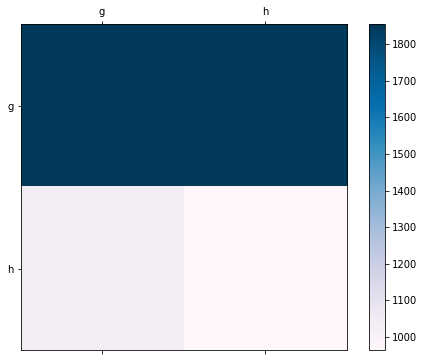

In [29]:
from matplotlib import cm
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

matrix = confusion_matrix(pulses_test_labels, pulses_predictions)

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
cax = ax.matshow(matrix, cmap=cm.get_cmap('PuBu'))
fig.colorbar(cax)

ax.set_xticklabels([''] + target_names)
ax.set_yticklabels([''] + target_names)

plt.show()

In [30]:
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_fscore_support

dc_f1_micro = f1_score(pulses_test_labels, pulses_predictions, average='micro')
dc_f1_macro = f1_score(pulses_test_labels, pulses_predictions, average='macro')

print("F1-Micro Average: " + str(dc_f1_micro))
print("F1-Macro Average: " + str(dc_f1_macro) + "\n")

print(classification_report(pulses_test_labels, pulses_predictions))

F1-Micro Average: 0.49386610585348756
F1-Macro Average: 0.4811873472504226

              precision    recall  f1-score   support

           g       0.64      0.50      0.56      3705
           h       0.34      0.48      0.40      2001

    accuracy                           0.49      5706
   macro avg       0.49      0.49      0.48      5706
weighted avg       0.54      0.49      0.51      5706



#### KNeighborsClassifier

In [32]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier() # default n: 5
knn.fit(pulses_train, pulses_train_labels) # fitting on train_set

pulses_predictions = knn.predict(pulses_test) # predicting on test_set

target_names = knn.classes_.tolist() # fetch class names

knn_default = accuracy_score(pulses_test_labels, pulses_predictions) * 100

In [33]:
knn_default

78.79425166491413

Η ακρίβεια σε αυτήν την περίπτωση είναι αισθητά υψηλότερη από προηγουμένως. Ας εξετάσουμε τις ανάλογες μετρικές απόδοσης:

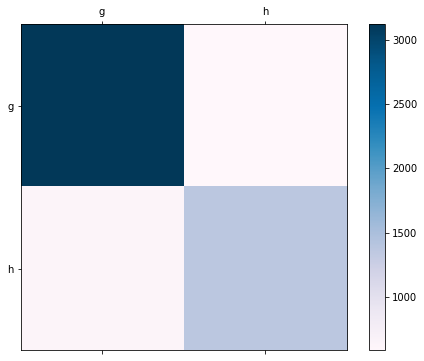

In [34]:
matrix = confusion_matrix(pulses_test_labels, pulses_predictions)

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
cax = ax.matshow(matrix, cmap=cm.get_cmap('PuBu'))
fig.colorbar(cax)

ax.set_xticklabels([''] + target_names)
ax.set_yticklabels([''] + target_names)

plt.show()

In [35]:
kn_f1_micro = f1_score(pulses_test_labels, pulses_predictions, average='micro')
kn_f1_macro = f1_score(pulses_test_labels, pulses_predictions, average='macro')

print("F1-Micro Average: " + str(kn_f1_micro))
print("F1-Macro Average: " + str(kn_f1_macro) + "\n")

print(classification_report(pulses_test_labels, pulses_predictions))

F1-Micro Average: 0.7879425166491413
F1-Macro Average: 0.7660359634997316

              precision    recall  f1-score   support

           g       0.83      0.84      0.84      3705
           h       0.70      0.69      0.69      2001

    accuracy                           0.79      5706
   macro avg       0.77      0.76      0.77      5706
weighted avg       0.79      0.79      0.79      5706



#### GaussianNBClassifier

In [49]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(pulses_train, pulses_train_labels) # fitting on train_set

pulses_predictions = gnb.predict(pulses_test) # predicting on test_set

target_names = gnb.classes_.tolist() # fetch class names

gnb_default = accuracy_score(pulses_test_labels, pulses_predictions) * 100

In [50]:
gnb_default

72.2397476340694

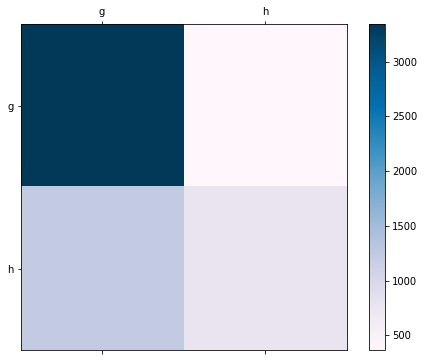

In [51]:
matrix = confusion_matrix(pulses_test_labels, pulses_predictions)

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
cax = ax.matshow(matrix, cmap=cm.get_cmap('PuBu'))
fig.colorbar(cax)

ax.set_xticklabels([''] + target_names)
ax.set_yticklabels([''] + target_names)

plt.show()

In [52]:
gnb_f1_micro = f1_score(pulses_test_labels, pulses_predictions, average='micro')
gnb_f1_macro = f1_score(pulses_test_labels, pulses_predictions, average='macro')

print("F1-Micro Average: " + str(gnb_f1_micro))
print("F1-Macro Average: " + str(gnb_f1_macro) + "\n")

print(classification_report(pulses_test_labels, pulses_predictions))

F1-Micro Average: 0.7223974763406941
F1-Macro Average: 0.6523006016020563

              precision    recall  f1-score   support

           g       0.73      0.90      0.81      3705
           h       0.68      0.39      0.50      2001

    accuracy                           0.72      5706
   macro avg       0.71      0.65      0.65      5706
weighted avg       0.71      0.72      0.70      5706



#### MLPClassifier

In [53]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier()
mlp.fit(pulses_train, pulses_train_labels) # fitting on train_set

pulses_predictions = mlp.predict(pulses_test) # predicting on test_set

target_names = mlp.classes_.tolist() # fetch class names

mlp_default = accuracy_score(pulses_test_labels, pulses_predictions) * 100

In [54]:
mlp_default

82.59726603575184

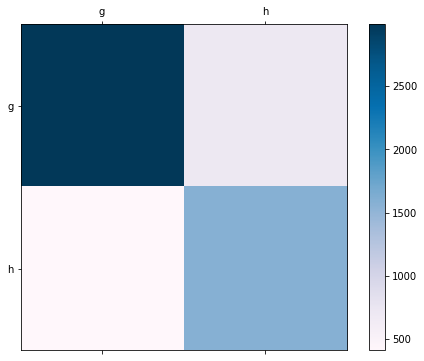

In [41]:
matrix = confusion_matrix(pulses_test_labels, pulses_predictions)

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
cax = ax.matshow(matrix, cmap=cm.get_cmap('PuBu'))
fig.colorbar(cax)

ax.set_xticklabels([''] + target_names)
ax.set_yticklabels([''] + target_names)

plt.show()

In [55]:
mlp_f1_micro = f1_score(pulses_test_labels, pulses_predictions, average='micro')
mlp_f1_macro = f1_score(pulses_test_labels, pulses_predictions, average='macro')

print("F1-Micro Average: " + str(mlp_f1_micro))
print("F1-Macro Average: " + str(mlp_f1_macro) + "\n")

print(classification_report(pulses_test_labels, pulses_predictions))

F1-Micro Average: 0.8259726603575184
F1-Macro Average: 0.8058984945845515

              precision    recall  f1-score   support

           g       0.85      0.88      0.87      3705
           h       0.77      0.72      0.74      2001

    accuracy                           0.83      5706
   macro avg       0.81      0.80      0.81      5706
weighted avg       0.82      0.83      0.82      5706



---

## Βελτίωση Ταξινομητών

---

## Τελική Αρχιτεκτονική Μετασχηματιστών